<a href="https://colab.research.google.com/github/BernardoSch/PCom/blob/main/Atividade_3_Transmiss%C3%A3o_de_dados_digital_com_FSK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Princípios de Comunicação
## Atividade Computacional 2 - Transmissão de dados digital com ASK

Esta atividade irá explorar os conceitos da transmissão de dados digitais. Um tipo de dado digital comum são as imagens, as quais serão as mensagens transmitidas neste trabalho.

O objetivo do trabalho é simular o processo de transmmissão de uma imagem, utilizando a técnica Pulse Code Modulation, associada à modulação ASK. Para isso, será necessário processar a imagem, de forma a obter uma sequência de bits a serem transmitidos. A seguir é apresentado o processo para transformar uma imagem em uma sequência de bits, a qual poderá ser usada para transmissão digital.

Serão utilizadas algumas bibliotecas do python, de forma a facilitar algumas etapas.

Bibliotecas:

*   numpy - Obtenção da Transformada Discreta de Fourier usando o algoritmo FFT
*   matplotlib - Gráficos
*   PIL - Biblioteca para manipulação de imagens
*   Requests e BytesIO - Bibliotecas que serão usadas para receber uma imagem a partir de um endereço http.

Text(0.5, 1.0, 'Imagem')

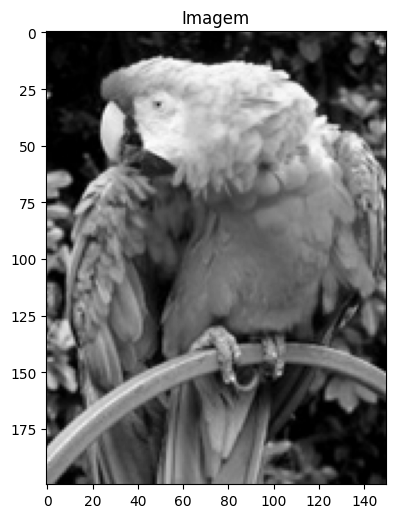

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO

# Carregando imagem
# Definindo endereço da imagem
url = "https://upload.wikimedia.org/wikipedia/commons/f/fa/Grayscale_8bits_palette_sample_image.png"
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36'}

# Obtendo a imagem
response = requests.get(url, headers=headers)

# Carregando a imagem usando a bilbioteca Pillow
im = Image.open(BytesIO(response.content)).convert('L')
# Convertendo a imagem para um array numpy
image=np.asarray(im)
# Plotando a imagem
plt.figure(figsize=(30, 20))
plt.subplot(3,1,1)
plt.imshow(image, cmap = 'gray')
plt.title('Imagem')

Uma imagem em escala de cinza pode ser visto como um array de dados bidimensional. Cada valor é um inteiro entre 0 e 255, fazendo com que seja possível representar esse valor com 8 bits. A seguir é apresentado como podemos converter um valor inteiro para uma sequência de bits.

In [ ]:
# Escolhendo um pixel da imagem
inteiro=image[3,0]
# Convertendo cada inteiro para uma string com sequência de bits
string_bits = format(inteiro, '08b')
# Convertendo a string em uma sequência de bits
array_bits = [int(bit) for bit in string_bits]
print(bit_array)

[0, 0, 0, 0, 1, 1, 0, 0]


# **Atividade**

Nesta atividade iremos desenvolver o processo de transmissão de um sinal digital (imagem), utilizando a modulação por chaveamento de amplitude (ASK), com a qual, é possível transmitir o dado digital de forma semelhante à transmissão de um sinal analógico em AM.

O sinal a ser transmitido deverá ser uma imagem em escala de cinza, a qual deverá ser transformada em um vetor unidimensional, no qual cada pixel será representado por uma sequência de 8 bits (ou seja, a imagem deverá ser convertida para escala de cinza e quantizada em 256 níveis).  

A sequência de bits deve ser transformada em uma sequência de pulsos, e modulada em ASK para transmissão em um canal compartilhado. O sinal transmitido deve ser recebido por um receptor, e a imagem deve ser recuperada, realizando a detecção de cada pulso recebido e a conversão da sequência de bits nos valores quantizados da imagem.

Etapas:
* Escolha uma imagem para ser transmitida. Essa imagem deve ser convertida para escala de cinza e quantizada em 8 bits (representada por um int8).
* A imagem deve ser transformada em um vetor unidimensional contendo a sequência de bits a ser transmitida.
* Converta a sequência de bits em uma sequência de pulsos a serem transmitidos, considerando uma taxa de transmissão adequada. O aluno deverá escolher uma codificação adequada e uma taxa de transmissão, a qual determinará largura de cada pulso.
* Module a sequência de pulsos em ASK.
* Transmita o sinal modulado em ASK simulando um canal de comunicação.
* Realize a recepção do sinal utilizando o receptor baseado na detecção de envoltória - o mesmo desenvolvido na Atividade 2.
* Detecte cada pulso do sinal recebido, converta as sequências de pulsos em valores quantizados e recupere a imagem original.

In [ ]:
# Implementação